# Row to Image Converter

The purpose of this notebook is to convert Probe Request rows coming from the dissected dataframe to images, in order to perform matching based on images.

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../../config.ini")

['../../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

import numpy as np

Import **image libraries**

In [4]:
from PIL import Image

Custom helper scripts

In [5]:
%cd ../../
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning/dissected

/home/bacci/COMPACT/notebooks


/home/bacci/COMPACT/notebooks/data_exploration_cleaning/dissected


## Import Data

In [6]:
# Combined dataframe
combined_df_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/selected_burst_dissected_df.csv"
)

In [7]:
df = pd.read_csv(combined_df_csv, index_col=0)

In [8]:
df

,MAC Address,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label
0,00:0f:00:6a:68:8b,2,279,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SamsungJ6_K
2,02:00:00:00:00:00,11,123,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SamsungM31_A
3,02:00:00:00:3e:b2,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4,02:00:3a:5e:a1:f4,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_B
5,02:02:70:30:b6:43,62,143,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,62,131,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
4411,fe:f9:fc:fb:83:9e,1,156,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone6_N
4412,fe:fc:07:34:10:69,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4413,fe:fc:aa:d1:89:d1,62,143,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W


In [9]:
df.drop(columns=["MAC Address", "Label"], inplace=True)

In [41]:
first_row_array = df.iloc[1235].values

In [42]:
first_row_array

array(['62', '135', '0.0', '3.0', '6.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '0.0', '1.0'], dtype=object)

In [43]:
im = Image.fromarray(np.array([first_row_array]).astype(np.float32))

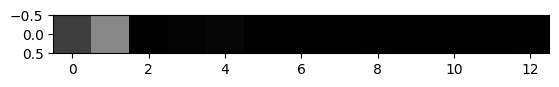

In [44]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()